## Motivação e objetivos

A gestão eficiente dos recursos hídricos é essencial para garantir o abastecimento sustentável de água em diversas atividades humanas, como agricultura, indústria e consumo doméstico. Nesse contexto, a análise hidrológica desempenha um papel fundamental na compreensão dos padrões de fluxo de água em uma bacia hidrográfica. Um dos aspectos-chave dessa análise é a determinação da curva de permanência e dos valores de $Q_{90}$, $Q_{95}$ e $Q_{7,10}$, que são indicadores cruciais para o planejamento e gerenciamento dos recursos hídricos.

A curva de permanência é uma ferramenta que representa a distribuição acumulada das vazões ao longo de um determinado período de tempo. Ela fornece informações valiosas sobre a variabilidade do fluxo de água, permitindo uma análise detalhada da disponibilidade hídrica em diferentes cenários. Por sua vez, os valores de $Q_{90}$, $Q_{95}$ e $Q_{7,10}$ representam os percentis da curva de permanência e são utilizados para caracterizar os diferentes níveis de vazão que podem ser esperados em uma bacia hidrográfica, com base em uma determinada frequência de ocorrência.

Neste projeto, propomos realizar uma análise abrangente da curva de permanência e determinar os valores de $Q_{90}$, $Q_{95}$ e $Q_{7,10}$ em uma bacia hidrográfica fictícia. Assim, ao compreender melhor a distribuição das vazões e os diferentes cenários de disponibilidade hídrica, este projeto pode contribuir para a tomada de decisões em relação ao uso e aproveitamento dos recursos hídricos, promovendo a sustentabilidade ambiental e socioeconômica nas regiões de interesse.

Para começar vamos importar algumas bibliotecas que serão úteis para a leitura e manipulação de dados como a pandas e numpy. Importamos a função matplotlib para fazer o gráfico da curva de permanência.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Agora podemos criar uma função para calcular a distribuição acumulada de uma série histórica de dados de vazão.

In [2]:
def calcular_distribuicao_acumulada(valores, resolucao):
    valores_amostrados = []
    percentuais_excedidos = []
    
    valores = pd.Series(valores)
    num_valores = len(valores)
    valor_minimo = valores.min()
    valor_maximo = valores.max()

    for valor in np.arange(valor_minimo, valor_maximo, resolucao):
        valores_amostrados.append(valor)
        percentual_excedido = len(valores[valores > valor]) * 100 / num_valores
        percentual_excedido = round(percentual_excedido, 5)
        percentuais_excedidos.append(percentual_excedido)

    return {"valores_amostrados": valores_amostrados, "percentuais_excedidos": percentuais_excedidos}


Para o nosso rio fictício vamos inferir valores aleatórios somente para termos dados para estudar.

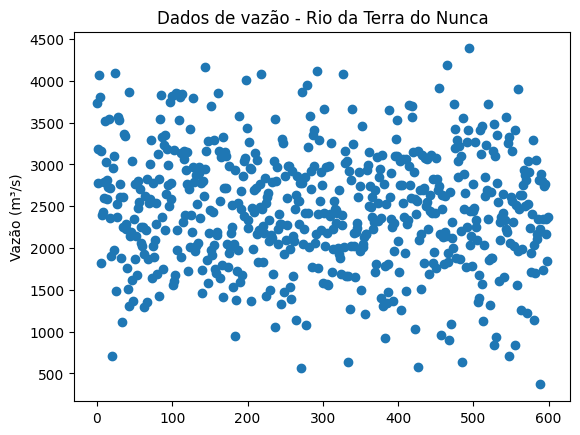

In [17]:
np.random.seed(0)
amostras = np.random.normal(2500, 700, 600)
plt.plot(amostras, 'o')
plt.title('Dados de vazão - Rio da Terra do Nunca')
plt.ylabel('Vazão (m³/s)')
plt.show()

Com os dados obtidos podemos chamar nossa função para obter a curva de permanência e organizá-la em ordem crescente em relação aos percentuais excedidos.

In [18]:
# Chamar a função para calcular a curva de permanência
resolucao = 0.01
dados_curva_permanencia = calcular_distribuicao_acumulada(amostras, resolucao)
dados_curva_permanencia_df = pd.DataFrame(dados_curva_permanencia).sort_values(by='percentuais_excedidos')
dados_curva_permanencia_df

,valores_amostrados,percentuais_excedidos
401965,4387.349862,0.16667
388718,4254.879862,0.16667
388719,4254.889862,0.16667
388720,4254.899862,0.16667
388721,4254.909862,0.16667
...,...,...
12768,495.379862,99.83333
12769,495.389862,99.83333
12770,495.399862,99.83333
12772,495.419862,99.83333


Com a curva de permanência obtida agora podemos obter os valores de $Q_{90}$ e $Q_{95}$. Para isso, fazemos uma interpolação das vazões com exatamente 90 e 95 % de percentual excedido.

In [19]:
q90 = np.interp(90, dados_curva_permanencia_df['percentuais_excedidos'], dados_curva_permanencia_df['valores_amostrados'])
q95 = np.interp(95, dados_curva_permanencia_df['percentuais_excedidos'], dados_curva_permanencia_df['valores_amostrados'])
print(f'Q90: {q90:.2f} m³/s')
print(f'Q95: {q95:.2f} m³/s')

Q90: 1566.96 m³/s
Q95: 1319.24 m³/s


Agora vamos calcular a $Q_{7,10}$. Esse procedimento também envolve a curva de permanência obtida anteriormente porém com algumas etapas a mais. Mais detalhes podem ser obtidos em https://sobreasaguas.com/2023/04/20/como-determinar-a-vazao-de-referencia-q-710/

O primeiro passo é obter os dados históricos das vazões do corpo aquático e calcular a média móvel dessa série de dados. O intervalo escolhido é de 7 dias consecutivos.

In [20]:
# Calcular a media movel
media_movel = pd.Series(amostras).rolling(window=7).mean()
media_movel

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
595    2236.364979
596    2493.975996
597    2417.971660
598    2281.051714
599    2285.146908
Length: 600, dtype: float64

Text(0, 0.5, 'Vazão (m³/s)')

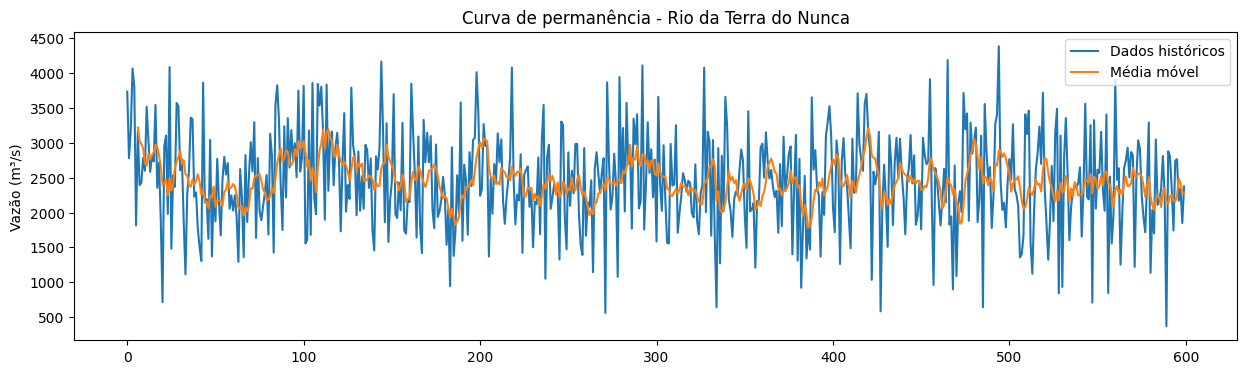

In [21]:
figure = plt.figure(figsize=(15,4))
plt.plot(amostras, label = 'Dados históricos')
plt.plot(media_movel, label = 'Média móvel')
plt.legend()
plt.title('Curva de permanência - Rio da Terra do Nunca')
plt.ylabel('Vazão (m³/s)')

Após calcular as médias móveis, é necessário agrupar esses dados anualmente e determinar a vazão mínima de cada ano.

Nesta situação particular com dados fictícios, podemos considerar 50 registros consecutivos como representativos de um ano. Assim, com 600 registros no total e considerando que cada conjunto de 50 registros corresponde a um ano, teremos 12 anos de registros de vazão mínima.

In [22]:
minimo_anual = media_movel.groupby(media_movel.index // 50).min()
minimo_anual

0     2057.541246
1     1957.400437
2     2296.057664
3     1832.282370
4     2096.438755
5     1962.649000
6     2004.261855
7     1780.750829
8     2062.702198
9     1837.771083
10    2055.385173
11    2032.658915
dtype: float64

Com esses valores de vazões mínimas anuais obtemos a média e desvio padrão.

In [23]:
minimo_anual_media = minimo_anual.mean()
minimo_anual_media
print(f'Vazão mínima média anual: {minimo_anual_media:.2f} m³/s')

minimo_anual_desvio = minimo_anual.std()
minimo_anual_desvio
print(f'Desvio padrão da vazão mínima média anual: {minimo_anual_desvio:.2f} m³/s')

Vazão mínima média anual: 1997.99 m³/s
Desvio padrão da vazão mínima média anual: 139.49 m³/s


Definimos a função de Gumbell para calcular a $Q_{7,10}$

In [24]:
def Gumbell(media, desvio, tempo_de_retorno):
    q710 = media + desvio * (0.45 + 0.7797 * np.log(np.log(tempo_de_retorno / (tempo_de_retorno - 1))))
    return q710

e determinamos que o tempo de retorno será de 10 anos.

In [25]:
tempo_de_retorno = 10
q710 = Gumbell(minimo_anual_media, minimo_anual_desvio, tempo_de_retorno)
print(f'Q710: {q710:.2f} m³/s')

Q710: 1816.01 m³/s


Com essa vazão precisamos determinar qual o valor da porcentagem correspondente na curva de permanência.

In [26]:
percent_q710 = np.interp(q710, dados_curva_permanencia["valores_amostrados"], dados_curva_permanencia["percentuais_excedidos"])
print(f'Q710_percentual_excedido: {percent_q710:.2f} %')

Q710_percentual_excedido: 82.17 %


Por fim, construímos a curva de permanência destacando as vazões $Q_{95}$, $Q_{90}$ e $Q_{7,10}$.

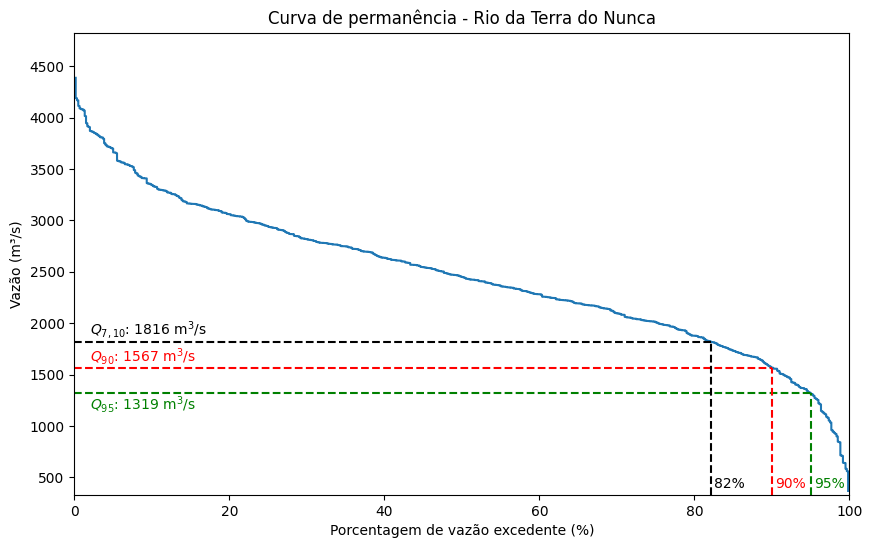

In [27]:
plt.figure(figsize=(10,6))
plt.plot(dados_curva_permanencia["percentuais_excedidos"], dados_curva_permanencia["valores_amostrados"])

# Definir limites e linhas para os valores Q95, Q90 e Q7,10
ymin = dados_curva_permanencia_df["valores_amostrados"].min() * 0.9
ymax = dados_curva_permanencia_df["valores_amostrados"].max() * 1.1
plt.ylim(ymin, ymax)
plt.xlim(0, 100)

# Inserir linhas para demonstrar os valores de Q95 e Q90
plt.axvline(x=95, color='g', linestyle='--', ymin = 0, ymax = (q95-ymin)/(ymax-ymin))
plt.axhline(y=q95, color='g', linestyle='--', xmin = 0, xmax = 0.95)

plt.axvline(x=90, color='r', linestyle='--', ymin = 0, ymax = (q90-ymin)/(ymax-ymin))
plt.axhline(y=q90, color='r', linestyle='--', xmin = 0, xmax = 0.90)

plt.axvline(x=percent_q710, color='k', linestyle='--', ymin = 0, ymax = (q710-ymin)/(ymax-ymin))
plt.axhline(y=q710, color='k', linestyle='--', xmin = 0, xmax = percent_q710/100)

# Inserir texto no gráfico das vazões
texto95 = r'$Q_{{95}}$: {:.0f} m$^3$/s'.format(q95)
texto90 = r'$Q_{{90}}$: {:.0f} m$^3$/s'.format(q90)
texto710 = r'$Q_{{7,10}}$: {:.0f} m$^3$/s'.format(q710)
texto710_percentual = r'{:.0f}%'.format(percent_q710)
texto90_percentual = r'90%'
texto95_percentual = r'95%'
plt.text(2, q95*0.88, texto95, fontsize=10, color='green')
plt.text(2, q90*1.04, texto90, fontsize=10, color='red')
plt.text(2, q710*1.04, texto710, fontsize=10, color='black')
plt.text(percent_q710*1.005, 400, texto710_percentual, fontsize=10, color='black')
plt.text(90*1.005, 400, texto90_percentual, fontsize=10, color='red')
plt.text(95*1.005, 400, texto95_percentual, fontsize=10, color='green')

# outras configurações
plt.xlabel('Porcentagem de vazão excedente (%)')
plt.ylabel('Vazão (m³/s)')
plt.title('Curva de permanência - Rio da Terra do Nunca')
plt.savefig('imagens/curva_permanencia.jpg', format='jpg', dpi=300, bbox_inches = 'tight')
plt.show()